In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as patches
from shapely.geometry import Point
from shapely.geometry.polygon import LinearRing,Polygon

# is_in_region(point, bot left grid, top left grid, top right grid, bot right grid )
def is_in_region(x, y, a1, a2, b1, b2, c1, c2, d1, d2):
    point = Point(x,y)
    polygon = Polygon([(a1,a2), (b1,b2), (c1,c2), (d1,d2)])
    return polygon.contains(point)

### Read in data

In [3]:
# later time step
nn = 200
# step interval
dn = 50

filename1=('../data/ptcls_info_t%3.3d.dat')%(nn)
x1,y1,vx1,vy1,vz1,m1,pe1=np.loadtxt(filename1,usecols=[0,1,2,3,4,5,6],unpack=True)
filename2=('../data/ptcls_info_t%3.3d.dat')%(nn-dn)
x2,y2,vx2,vy2,vz2,m2,pe2=np.loadtxt(filename2,usecols=[0,1,2,3,4,5,6],unpack=True)

omega_bar = 0.542
CR_bar = 3.2
CR_spiral = 7.0

R_max = 8.

Ej_min = -20.
Ej_max = 0.
dEj_min = -15.
dEj_max = 15.

#r1, r2, ang1, ang2, Ej1, Ej2
if(len(x1) == len(x2)):
    r1 = [np.sqrt(x1[i]**2 + y1[i]**2) for i in range(len(x1))]
    r2 = [np.sqrt(x2[i]**2 + y2[i]**2) for i in range(len(x2))]
    ang1 = [x1[i]*vy1[i]-y1[i]*vx1[i] for i in range(len(x1))]
    ang2 = [x2[i]*vy2[i]-y2[i]*vx2[i] for i in range(len(x2))]
    te1 = [0.5 * (vx1[i]**2 + vy1[i]**2 + vz1[i]**2) + pe1[i] for i in range(len(x1))]
    te2 = [0.5 * (vx2[i]**2 + vy2[i]**2 + vz2[i]**2) + pe2[i] for i in range(len(x2))]
    dr = [r1[i] - r2[i] for i in range(len(x1))]
    da = [ang1[i] - ang2[i] for i in range(len(x1))]
    Ej1 = [pe1[i]+0.5*(vx1[i]**2+vy1[i]**2+vz1[i]**2)+omega_bar*(vx1[i]*y1[i]-vy1[i]*x1[i])-0.5*omega_bar**2*r1[i]**2 for i in range(len(x1))]
    Ej2 = [pe2[i]+0.5*(vx2[i]**2+vy2[i]**2+vz2[i]**2)+omega_bar*(vx2[i]*y2[i]-vy2[i]*x2[i])-0.5*omega_bar**2*r2[i]**2 for i in range(len(x2))]
    dEj = [Ej1[i] - Ej2[i] for i in range(len(x1))]
else:
    print('error: NOT equal size!')

### 1. plot E<sub>J</sub> - &Delta;E<sub>J</sub>, and dissect it into different regions

In [4]:
# set-up for the polygons
# section 1
bar_a1 = -2.0
bar_a2 = -2.5
bar_pta = ((bar_a1-Ej_min)/(Ej_max-Ej_min), (bar_a2-dEj_min)/(dEj_max-dEj_min))
bar_b1 = -4.5
bar_b2 = 3.0
bar_ptb = ((bar_b1-Ej_min)/(Ej_max-Ej_min), (bar_b2-dEj_min)/(dEj_max-dEj_min))
bar_c1 = -1
bar_c2 = 0.1
bar_ptc = ((bar_c1-Ej_min)/(Ej_max-Ej_min), (bar_c2-dEj_min)/(dEj_max-dEj_min))
bar_d1 = -1
bar_d2 = -0.1
bar_ptd = ((bar_d1-Ej_min)/(Ej_max-Ej_min), (bar_d2-dEj_min)/(dEj_max-dEj_min))
# section 2
cr1_a1 = -2.5
cr1_a2 = -3
cr1_pta = ((cr1_a1-Ej_min)/(Ej_max-Ej_min), (cr1_a2-dEj_min)/(dEj_max-dEj_min))
cr1_b1 = -6.0
cr1_b2 = 3.5
cr1_ptb = ((cr1_b1-Ej_min)/(Ej_max-Ej_min), (cr1_b2-dEj_min)/(dEj_max-dEj_min))
cr1_c1 = bar_b1
cr1_c2 = bar_b2
#cr1_c1 = -4.2
#cr1_c2 = 2.5
cr1_ptc = ((cr1_c1-Ej_min)/(Ej_max-Ej_min), (cr1_c2-dEj_min)/(dEj_max-dEj_min))
cr1_d1 = bar_a1
cr1_d2 = bar_a2
#cr1_d1 = -1.8
#cr1_d2 = -2.5
cr1_ptd = ((cr1_d1-Ej_min)/(Ej_max-Ej_min), (cr1_d2-dEj_min)/(dEj_max-dEj_min))
# section 3
cr2_a1 = -4.
cr2_a2 = -3.
cr2_pta = ((cr2_a1-Ej_min)/(Ej_max-Ej_min), (cr2_a2-dEj_min)/(dEj_max-dEj_min))
cr2_b1 = -7.
cr2_b2 = 3.5
cr2_ptb = ((cr2_b1-Ej_min)/(Ej_max-Ej_min), (cr2_b2-dEj_min)/(dEj_max-dEj_min))
cr2_c1 = cr1_b1
cr2_c2 = cr1_b2
#cr2_c1 = -6.0
#cr2_c2 = 3.5
cr2_ptc = ((cr2_c1-Ej_min)/(Ej_max-Ej_min), (cr2_c2-dEj_min)/(dEj_max-dEj_min))
cr2_d1 = cr1_a1
cr2_d2 = cr1_a2
#cr2_d1 = -2.5
#cr2_d2 = -3
cr2_ptd = ((cr2_d1-Ej_min)/(Ej_max-Ej_min), (cr2_d2-dEj_min)/(dEj_max-dEj_min))
# section 4
sp_a1 = -5
sp_a2 = -12
sp_pta = ((sp_a1-Ej_min)/(Ej_max-Ej_min), (sp_a2-dEj_min)/(dEj_max-dEj_min))
sp_b1 = -16
sp_b2 = 11
sp_ptb = ((sp_b1-Ej_min)/(Ej_max-Ej_min), (sp_b2-dEj_min)/(dEj_max-dEj_min))
sp_c1 = cr2_b1
sp_c2 = cr2_b2
#sp_c1 = -7.
#sp_c2 = 3.5
sp_ptc = ((sp_c1-Ej_min)/(Ej_max-Ej_min), (sp_c2-dEj_min)/(dEj_max-dEj_min))
sp_d1 = cr2_a1
sp_d2 = cr2_a2
#sp_d1 = -4.
#sp_d2 = -3.
sp_ptd = ((sp_d1-Ej_min)/(Ej_max-Ej_min), (sp_d2-dEj_min)/(dEj_max-dEj_min))

# plot polygons
ring11 = LinearRing([bar_pta, bar_ptb, bar_ptc, bar_ptd])
bx1, by1 = ring11.xy

ring21 = LinearRing([cr1_pta, cr1_ptb, cr1_ptc, cr1_ptd])
cr1x1, cr1y1 = ring21.xy

ring31 = LinearRing([cr2_pta, cr2_ptb, cr2_ptc, cr2_ptd])
cr2x1, cr2y1 = ring31.xy

ring41 = LinearRing([sp_pta, sp_ptb, sp_ptc, sp_ptd])
spx1, spy1 = ring41.xy

In [5]:
# set-up for the polygons (t=50)
# section 1
bar_a1 = -2.0
bar_a2 = -2.5
bar_pta = ((bar_a1-Ej_min)/(Ej_max-Ej_min), (bar_a2-dEj_min)/(dEj_max-dEj_min))
bar_b1 = -4.5
bar_b2 = 3.0
bar_ptb = ((bar_b1-Ej_min)/(Ej_max-Ej_min), (bar_b2-dEj_min)/(dEj_max-dEj_min))
bar_c1 = -1
bar_c2 = 0.1
bar_ptc = ((bar_c1-Ej_min)/(Ej_max-Ej_min), (bar_c2-dEj_min)/(dEj_max-dEj_min))
bar_d1 = -1
bar_d2 = -0.1
bar_ptd = ((bar_d1-Ej_min)/(Ej_max-Ej_min), (bar_d2-dEj_min)/(dEj_max-dEj_min))
# section 2
cr1_a1 = -2.
cr1_a2 = -5.
cr1_pta = ((cr1_a1-Ej_min)/(Ej_max-Ej_min), (cr1_a2-dEj_min)/(dEj_max-dEj_min))
cr1_b1 = -8.
cr1_b2 = 5.
cr1_ptb = ((cr1_b1-Ej_min)/(Ej_max-Ej_min), (cr1_b2-dEj_min)/(dEj_max-dEj_min))
cr1_c1 = bar_b1
cr1_c2 = bar_b2
#cr1_c1 = -4.2
#cr1_c2 = 2.5
cr1_ptc = ((cr1_c1-Ej_min)/(Ej_max-Ej_min), (cr1_c2-dEj_min)/(dEj_max-dEj_min))
cr1_d1 = bar_a1
cr1_d2 = bar_a2
#cr1_d1 = -1.8
#cr1_d2 = -2.5
cr1_ptd = ((cr1_d1-Ej_min)/(Ej_max-Ej_min), (cr1_d2-dEj_min)/(dEj_max-dEj_min))
# section 3
cr2_a1 = -4.
cr2_a2 = -10.
cr2_pta = ((cr2_a1-Ej_min)/(Ej_max-Ej_min), (cr2_a2-dEj_min)/(dEj_max-dEj_min))
cr2_b1 = -12.
cr2_b2 = 7.
cr2_ptb = ((cr2_b1-Ej_min)/(Ej_max-Ej_min), (cr2_b2-dEj_min)/(dEj_max-dEj_min))
cr2_c1 = cr1_b1
cr2_c2 = cr1_b2
#cr2_c1 = -6.0
#cr2_c2 = 3.5
cr2_ptc = ((cr2_c1-Ej_min)/(Ej_max-Ej_min), (cr2_c2-dEj_min)/(dEj_max-dEj_min))
cr2_d1 = cr1_a1
cr2_d2 = cr1_a2
#cr2_d1 = -2.5
#cr2_d2 = -3
cr2_ptd = ((cr2_d1-Ej_min)/(Ej_max-Ej_min), (cr2_d2-dEj_min)/(dEj_max-dEj_min))
# section 4
sp_a1 = -8.
sp_a2 = -9.
sp_pta = ((sp_a1-Ej_min)/(Ej_max-Ej_min), (sp_a2-dEj_min)/(dEj_max-dEj_min))
sp_b1 = -15.
sp_b2 = 5.
sp_ptb = ((sp_b1-Ej_min)/(Ej_max-Ej_min), (sp_b2-dEj_min)/(dEj_max-dEj_min))
sp_c1 = cr2_b1
sp_c2 = cr2_b2
#sp_c1 = -7.
#sp_c2 = 3.5
sp_ptc = ((sp_c1-Ej_min)/(Ej_max-Ej_min), (sp_c2-dEj_min)/(dEj_max-dEj_min))
sp_d1 = cr2_a1
sp_d2 = cr2_a2
sp_ptd = ((sp_d1-Ej_min)/(Ej_max-Ej_min), (sp_d2-dEj_min)/(dEj_max-dEj_min))

# plot polygons
ring12 = LinearRing([bar_pta, bar_ptb, bar_ptc, bar_ptd])
bx2, by2 = ring12.xy

ring22 = LinearRing([cr1_pta, cr1_ptb, cr1_ptc, cr1_ptd])
cr1x2, cr1y2 = ring22.xy

ring32 = LinearRing([cr2_pta, cr2_ptb, cr2_ptc, cr2_ptd])
cr2x2, cr2y2 = ring32.xy

ring42 = LinearRing([sp_pta, sp_ptb, sp_ptc, sp_ptd])
spx2, spy2 = ring42.xy

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


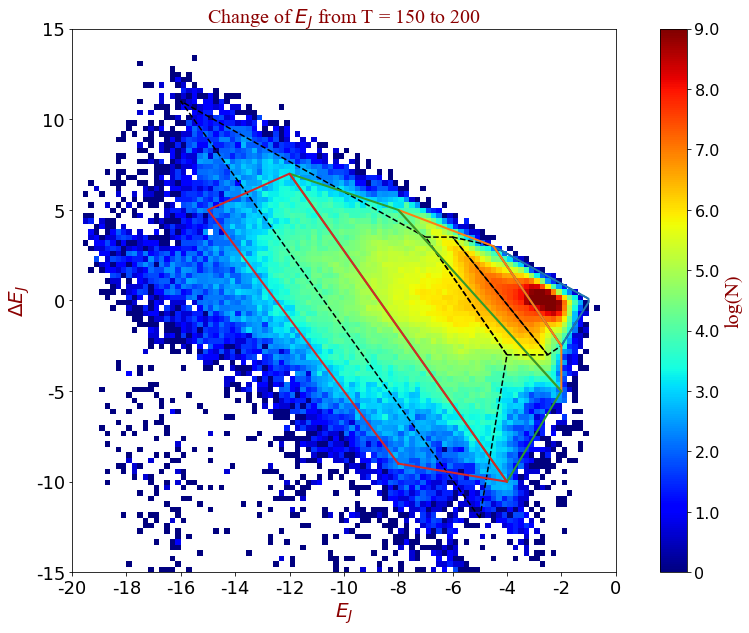

In [6]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('jet')
#normalize colorbar
#norm= matplotlib.colors.Normalize(vmin=0,vmax=5)
#Ej, \delta_{Ej}-plane
H,xedges,yedges = np.histogram2d(dEj,Ej2,bins=(100,100),range=([dEj_min, dEj_max],[Ej_min,Ej_max]))

gci=plt.imshow(np.log(H),interpolation='nearest',extent=extent,origin='low',cmap=cmap)

# plot old polygons
ax.plot(bx1, by1, 'k--')
ax.plot(cr1x1, cr1y1, 'k--')
ax.plot(cr2x1, cr2y1, 'k--')
ax.plot(spx1, spy1, 'k--')

ax.plot(bx2, by2, linewidth=2.)
ax.plot(cr1x2, cr1y2, linewidth=2.)
ax.plot(cr2x2, cr2y2, linewidth=2.)
ax.plot(spx2, spy2, linewidth=2.)


#set ticks
ax = plt.gca()
#ax.set_xlabel('X')
ax.set_xticks(np.linspace(0,1,11))
ax.set_xticklabels( ('-20', '-18', '-16', '-14', '-12', '-10', '-8', '-6', '-4', '-2', '0'))
#ax.set_ylabel('Y')
ax.set_yticks(np.linspace(0,1,7))
ax.set_yticklabels( ('-15', '-10', '-5', '0', '5', '10', '15'))

#set labels
ax.set_xlabel('$E_{J}$',fontdict=font)
ax.set_ylabel('$\Delta E_{J}$',fontdict=font)

#colorbar
cbar = fig.colorbar(gci)
cbar.set_label('log(N)',fontdict=font)
cbar.set_ticks(np.linspace(0,9,10))
cbar.set_ticklabels( ('0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0'))
cbar.ax.tick_params(labelsize=16)
plt.clim(0,9)

#title
titleStr='Change of $E_{J}$ from T = '+str(nn-dn)+' to '+str(nn)
plt.title(titleStr,fontdict=font)

#savefig
figname1='./output/dissect/dEj_t'+str(nn-dn)+'_to_'+str(nn)+'_color.png'
plt.savefig(figname1)

### 2. select out the (x, y) indices from E<sub>J</sub> - &Delta;E<sub>J</sub> map.

In [7]:
Ej = np.asarray(Ej2)
dE_J = np.asarray(dEj)
aat = 0
bbt = 0
cct = 0
ddt = 0
Exa = []
Eya = []
Exb = []
Eyb = []
Exc = []
Eyc = []
Exd = []
Eyd = []
aa = []
daa = []
ab = []
dab = []
ac = []
dac = []
ad = []
dad = []

for i in range(len(x2)):
    if is_in_region(Ej[i], dE_J[i], bar_a1, bar_a2, bar_b1, bar_b2, bar_c1, bar_c2, bar_d1, bar_d2):
        Exa.append(x2[i])
        Eya.append(y2[i])
        aa.append(ang2[i])
        daa.append(da[i])
        aat += 1
    elif is_in_region(Ej[i], dE_J[i], cr1_a1, cr1_a2, cr1_b1, cr1_b2, cr1_c1, cr1_c2, cr1_d1, cr1_d2):
        Exb.append(x2[i])
        Eyb.append(y2[i])
        ab.append(ang2[i])
        dab.append(da[i])
        bbt += 1
    elif is_in_region(Ej[i], dE_J[i], cr2_a1, cr2_a2, cr2_b1, cr2_b2, cr2_c1, cr2_c2, cr2_d1, cr2_d2):
        Exc.append(x2[i])
        Eyc.append(y2[i])
        ac.append(ang2[i])
        dac.append(da[i])
        cct += 1
    elif is_in_region(Ej[i], dE_J[i], sp_a1, sp_a2, sp_b1, sp_b2, sp_c1, sp_c2, sp_d1, sp_d2):
        Exd.append(x2[i])
        Eyd.append(y2[i])
        ad.append(ang2[i])
        dad.append(da[i])
        ddt += 1
    else:
        continue
print(aat, bbt, cct, ddt)

629242 177290 125128 41428


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log


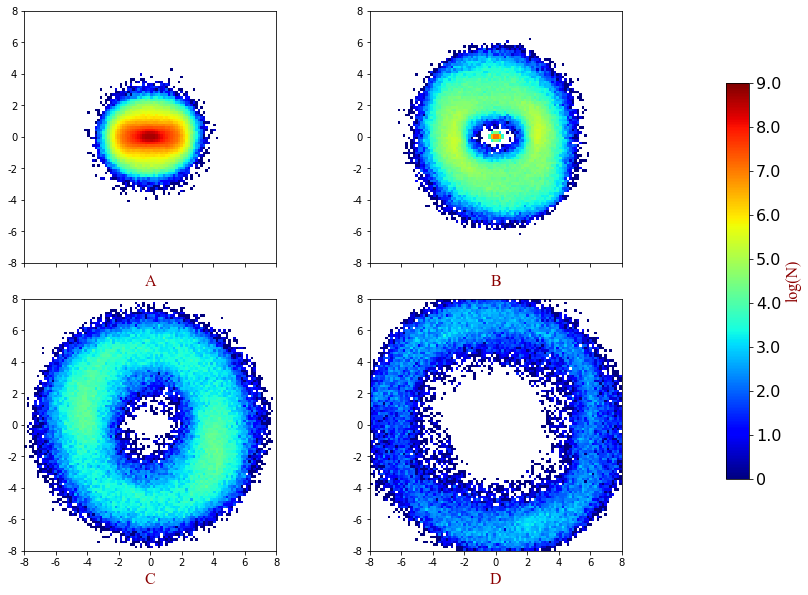

In [8]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax1 = fig.add_axes([0.1, 0.5, 0.4, 0.35])
ax2 = fig.add_axes([0.4, 0.5, 0.4, 0.35])
ax3 = fig.add_axes([0.1, 0.1, 0.4, 0.35])
ax4 = fig.add_axes([0.4, 0.1, 0.4, 0.35])

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 16,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('jet')
#normalize colorbar
norm= matplotlib.colors.Normalize(vmin=0,vmax=9.)

#PLOT 1
H1,xedges1,yedges1 = np.histogram2d(Eya,Exa,bins=(100,100),range=([-8.,8.],[-8.,8.]))

gci=ax1.imshow(np.log(H1),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#ax1.add_patch(plt.Circle((0,0),CR_bar,color='black'))

#set ticks
#ax1.set_xlabel('X')
ax1.set_xticks(np.linspace(0,1,9))
ax1.set_xticklabels( (''))
#ax1.set_ylabel('Y')
ax1.set_yticks(np.linspace(0,1,9))
ax1.set_yticklabels(('-8', '-6', '-4', '-2', '0',  '2',  '4',  '6', '8'))

#set labels
ax1.set_xlabel('A',fontdict=font)
#ax1.set_ylabel('Y',fontdict=font)

########################

#PLOT 2
H2,xedges2,yedges2 = np.histogram2d(Eyb,Exb,bins=(100,100),range=([-8.,8.],[-8.,8.]))

ax2.imshow(np.log(H2),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax2.set_xlabel('X')
ax2.set_xticks(np.linspace(0,1,9))
ax2.set_xticklabels( (''))
#ax2.set_ylabel('Y')
ax2.set_yticks(np.linspace(0,1,9))
ax2.set_yticklabels(('-8', '-6', '-4', '-2', '0',  '2',  '4',  '6', '8'))

#set labels
ax2.set_xlabel('B',fontdict=font)
#ax2.set_ylabel('')

########################

#PLOT 3
H3,xedges3,yedges3 = np.histogram2d(Eyc,Exc,bins=(100,100),range=([-8.,8.],[-8.,8.]))

ax3.imshow(np.log(H3),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax3.set_xlabel('X')
ax3.set_xticks(np.linspace(0,1,9))
ax3.set_xticklabels( ('-8', '-6', '-4', '-2', '0',  '2',  '4',  '6', '8'))
#ax3.set_ylabel('Y')
ax3.set_yticks(np.linspace(0,1,9))
ax3.set_yticklabels(('-8', '-6', '-4', '-2', '0',  '2',  '4',  '6', '8'))

#set labels
ax3.set_xlabel('C',fontdict=font)
#ax3.set_ylabel('')

########################

#PLOT 4
H4,xedges4,yedges4 = np.histogram2d(Eyd,Exd,bins=(100,100),range=([-8.,8.],[-8.,8.]))

ax4.imshow(np.log(H4),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax4.set_xlabel('X')
ax4.set_xticks(np.linspace(0,1,9))
ax4.set_xticklabels( ('-8', '-6', '-4', '-2', '0', '2',  '4',  '6', '8'))
#ax4.set_ylabel('Y')
ax4.set_yticks(np.linspace(0,1,9))
ax4.set_yticklabels(('-8', '-6', '-4', '-2', '0',  '2',  '4',  '6', '8'))

#set labels
ax4.set_xlabel('D',fontdict=font)

#colorbar
cbar_ax = fig.add_axes([0.8, 0.20, 0.02, 0.55])
cbar = fig.colorbar(gci, cax=cbar_ax)
cbar.set_label('log(N)',fontdict=font)
cbar.set_ticks(np.linspace(0,9,10))
cbar.set_ticklabels( ('0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0'))
cbar.ax.tick_params(labelsize=16)
#plt.clim(0,8)

#savefig
figname2='./output/dissect/dEj_sect_t'+str(nn-dn)+'to'+str(nn)+'.png'
plt.savefig(figname2)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: divide by zero encountered in log


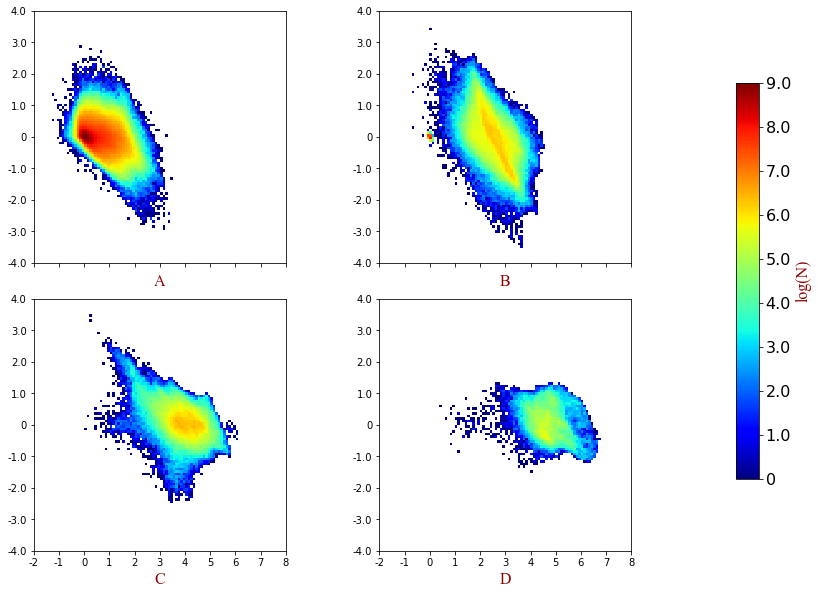

In [9]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax1 = fig.add_axes([0.1, 0.5, 0.4, 0.35])
ax2 = fig.add_axes([0.4, 0.5, 0.4, 0.35])
ax3 = fig.add_axes([0.1, 0.1, 0.4, 0.35])
ax4 = fig.add_axes([0.4, 0.1, 0.4, 0.35])

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 16,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('jet')
#normalize colorbar
norm= matplotlib.colors.Normalize(vmin=0,vmax=9.)

#PLOT 1
H1,xedges1,yedges1 = np.histogram2d(daa,aa,bins=(100,100),range=([-4.,4.],[-2.,8.]))

gci=ax1.imshow(np.log(H1),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#ax1.add_patch(plt.Circle((0,0),CR_bar,color='black'))

#set ticks
#ax.set_xlabel('X')
ax1.set_xticks(np.linspace(0,1,11))
ax1.set_xticklabels( (''))
#ax1.set_ylabel('Y')
ax1.set_yticks(np.linspace(0,1,9))
ax1.set_yticklabels( ('-4.0', '-3.0', '-2.0', '-1.0', '0', '1.0', '2.0', '3.0', '4.0'))

#set labels
ax1.set_xlabel('A',fontdict=font)
#ax1.set_ylabel('Y',fontdict=font)

########################

#PLOT 2
H2,xedges2,yedges2 = np.histogram2d(dab,ab,bins=(100,100),range=([-4.,4.],[-2.,8.]))

ax2.imshow(np.log(H2),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#set ticks
#ax.set_xlabel('X')
ax2.set_xticks(np.linspace(0,1,11))
ax2.set_xticklabels( (''))
#ax1.set_ylabel('Y')
ax2.set_yticks(np.linspace(0,1,9))
ax2.set_yticklabels( ('-4.0', '-3.0', '-2.0', '-1.0', '0', '1.0', '2.0', '3.0', '4.0'))

#set labels
ax2.set_xlabel('B',fontdict=font)
#ax2.set_ylabel('')

########################

#PLOT 3
H3,xedges3,yedges3 = np.histogram2d(dac,ac,bins=(100,100),range=([-4.,4.],[-2.,8.]))

ax3.imshow(np.log(H3),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax.set_xlabel('X')
ax3.set_xticks(np.linspace(0,1,11))
ax3.set_xticklabels( ('-2', '-1', '0', '1', '2', '3', '4', '5', '6', '7', '8'))
#ax3.set_ylabel('Y')
ax3.set_yticks(np.linspace(0,1,9))
ax3.set_yticklabels( ('-4.0', '-3.0', '-2.0', '-1.0', '0', '1.0', '2.0', '3.0', '4.0'))

#set labels
ax3.set_xlabel('C',fontdict=font)
#ax3.set_ylabel('')

########################

#PLOT 4
H4,xedges4,yedges4 = np.histogram2d(dad,ad,bins=(100,100),range=([-4.,4.],[-2.,8.]))

ax4.imshow(np.log(H4),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax.set_xlabel('X')
ax4.set_xticks(np.linspace(0,1,11))
ax4.set_xticklabels( ('-2', '-1', '0', '1', '2', '3', '4', '5', '6', '7', '8'))
#ax4.set_ylabel('Y')
ax4.set_yticks(np.linspace(0,1,9))
ax4.set_yticklabels( ('-4.0', '-3.0', '-2.0', '-1.0', '0', '1.0', '2.0', '3.0', '4.0'))

#set labels
ax4.set_xlabel('D',fontdict=font)

#colorbar
cbar_ax = fig.add_axes([0.8, 0.20, 0.02, 0.55])
cbar = fig.colorbar(gci, cax=cbar_ax)
cbar.set_label('log(N)',fontdict=font)
cbar.set_ticks(np.linspace(0,9,10))
cbar.set_ticklabels( ('0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0'))
cbar.ax.tick_params(labelsize=16)
#plt.clim(0,8)

#savefig
figname3='./output/dissect/da_sect_t'+str(nn-dn)+'to'+str(nn)+'.png'
plt.savefig(figname3)